In [1]:
# imported required modules
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read in files line by line and seperate
def extractData(infile,outfile,head = True):
    line = infile.readline()
    if head == True:
        header = line
        outfile.write(header)
    line = infile.readline()
    while line:
        sline = line.split(" ")
        type3 = -1
        for elem in sline[6:]:
            if elem[:5] == "type1":
                type1 = int(elem[6:])
            elif elem[:5] == "type2":
                type2 = int(elem[6:])
            elif elem[:5] == "type3":
                type3 = int(elem[6:])
        if type1 == 14 and (type2 != 14 or (type3 !=14 and type3 >= 0)):
            outfile.write(line)
        elif type2 == 14 and (type1 != 14 or(type3 !=14 and type3 >= 0)):
            outfile.write(line)
        elif (type1 != 14 or type2 != 14) and type3 ==14:
            outfile.write(line)
        line = infile.readline()

In [3]:
# create list for black hole masses
def findSysInfo(infile,convfile):
    # zero all values
    times = []
    bhMass = []
    compMass = []
    compType = []
    ss = 0
    bs = 0
    bb = 0
    compTime = []
    isMSMass = []
    isMSTime = []
    notMS = []
    
    # read in header
    line = infile.readline()
    header = line
    
    # read in data file
    line = infile.readline()
    while line:
        
        # initialize type3 since it is not guarenteed to exist
        type3 = -1
        
        # split line
        sline = line.split(" ")
        
        # find time of collision
        t = float(sline[0][2:])
        times.append(t)
        
        # grab object type data
        for elem in sline[6:]:
            if elem[:5] == "type1":
                type1 = int(elem[6:])
            elif elem[:5] == "type2":
                type2 = int(elem[6:])
            elif elem[:5] == "type3":
                type3 = int(elem[6:])
        info = sline[3].split(":")
        
        # find black hole masses
        if type1 == 14:
            smass = info[0].split("(")
            bhMass.append(float(smass[1][3:-1]))
        elif type2 == 14:
            smass = info[1].split("(")
            bhMass.append(float(smass[1][3:-1]))
        else:
            smass = info[2].split("(")
            bhMass.append(float(smass[1][3:-1]))
        
        # find mass and type of companion
        if type1 != 14:
            compType.append(type1)
            smass = info[0].split("(")
            m = float(smass[1][3:-1])
            compMass.append(m)
            compTime.append(t)
#             if type1 == 0 or type1 == 1:
#                 isMSTime.append(t)
#                 isMSMass.append(m)
#             else:
#                 notMS.append([t,m])
        if type2 != 14:
            compType.append(type2)
            smass = info[1].split("(")
            m = float(smass[1][3:-1])
            compMass.append(m)
            compTime.append(t)
#             if type2 == 0 or type2 == 1:
#                 isMSTime.append(t)
#                 isMSMass.append(m)
#             else:
#                 notMS.append([t,m])
        if type3 != 14 and type3 >= 0:
            compType.append(type3)
            smass = info[2].split("(")
            m = float(smass[1][3:-1])
            compMass.append(m)
            compTime.append(t)
#             if type3 == 0 or type3 == 1:
#                 isMSTime.append(t)
#                 isMSMass.append(m)
#             else:
#                 notMS.append([t,m])

        # count interaction type
        if sline[1] == "single-single": 
            ss += 1
        elif sline[1] == "binary-single": 
            bs += 1
        else: 
            bb += 1
            
        # read next line
        line = infile.readline()
        
    # get conversion factors from conversion file
    convline = convfile.readline()
    while convline:
        if convline[:12] == "timeunitsmyr":
            tconvfact = float(convline[13:])
        elif convline[:13] == "mstarunitmsun":
            mconvfact = float(convline[14:])
        convline = convfile.readline()
    
    print([tconvfact,mconvfact])
        
    # convert times to Myrs
    for i in range(len(times)):
        times[i] = times[i] * tconvfact
        compTime[i] = compTime[i] * tconvfact
#     for i in range(len(isMSTime)):
#         isMSTime[i] = isMSTime[i] * tconvfact
        
    # convert masses to Msun
    for i in range(len(bhMass)):
        bhMass[i] = bhMass[i] * mconvfact
    for i in range(len(compMass)):
        compMass[i] = compMass[i] * mconvfact
#     for i in range(len(isMSMass)):
#         isMSMass[i] = isMSMass[i] * mconvfact
        
    # return lists
    return times,bhMass,compMass,compType,ss,bs,bb,compTime  #,isMSTime,isMSMass,notMS

In [4]:
# open files
rv05 = open("data/poorBH/initial.collision0.5.log")
rv06 = open("data/poorBH/initial.collision0.6.log")
rv07 = open("data/poorBH/initial.collision0.7.log")
rv08 = open("data/interBH/initial.collision0.8.log")
rv09 = open("data/interBH/initial.collision0.9.log")
rv10 = open("data/interBH/initial.collision1.log")
rv150 = open("data/richBH/initial.collision1.5.log")
rv175 = open("data/richBH/initial.collision1.75.log")
rv20 = open("data/richBH/initial.collision2.log")
rv30 = open("data/richBH/initial.collision3.log")
rv05out = open("data/poorBH/bhstar.collision0.5.log",mode='w')
rv06out = open("data/poorBH/bhstar.collision0.6.log",mode='w')
rv07out = open("data/poorBH/bhstar.collision0.7.log",mode='w')
rv08out = open("data/interBH/bhstar.collision0.8.log",mode='w')
rv09out = open("data/interBH/bhstar.collision0.9.log",mode='w')
rv10out = open("data/interBH/bhstar.collision1.log",mode='w')
rv150out = open("data/richBH/bhstar.collision1.5.log",mode='w')
rv175out = open("data/richBH/bhstar.collision1.75.log",mode='w')
rv20out = open("data/richBH/bhstar.collision2.log",mode='w')
rv30out = open("data/richBH/bhstar.collision3.log",mode='w')

In [5]:
extractData(rv05,rv05out)
extractData(rv06,rv06out)
extractData(rv07,rv07out)
extractData(rv08,rv08out)
extractData(rv09,rv09out)
extractData(rv10,rv10out)
extractData(rv150,rv150out)
extractData(rv175,rv175out)
extractData(rv20,rv20out)
extractData(rv30,rv30out)

In [6]:
# close files
rv05.close()
rv06.close()
rv07.close()
rv08.close()
rv09.close()
rv10.close()
rv150.close()
rv175.close()
rv20.close()
rv30.close()
rv05out.close()
rv06out.close()
rv07out.close()
rv08out.close()
rv09out.close()
rv10out.close()
rv150out.close()
rv175out.close()
rv20out.close()
rv30out.close()

In [7]:
#open needed files
rv05out = open("data/poorBH/bhstar.collision0.5.log")
rv06out = open("data/poorBH/bhstar.collision0.6.log")
rv07out = open("data/poorBH/bhstar.collision0.7.log")
rv08out = open("data/interBH/bhstar.collision0.8.log")
rv09out = open("data/interBH/bhstar.collision0.9.log")
rv10out = open("data/interBH/bhstar.collision1.log")
rv150out = open("data/richBH/bhstar.collision1.5.log")
rv175out = open("data/richBH/bhstar.collision1.75.log")
rv20out = open("data/richBH/bhstar.collision2.log")
rv30out = open("data/richBH/bhstar.collision3.log")
conv05 = open("data/poorBH/initial.conv0.5.sh")
conv06 = open("data/poorBH/initial.conv0.6.sh")
conv07 = open("data/poorBH/initial.conv0.7.sh")
conv08 = open("data/interBH/initial.conv0.8.sh")
conv09 = open("data/interBH/initial.conv0.9.sh")
conv10 = open("data/interBH/initial.conv1.sh")
conv150 = open("data/richBH/initial.conv1.5.sh")
conv175 = open("data/richBH/initial.conv1.75.sh")
conv20 = open("data/richBH/initial.conv2.sh")
conv30 = open("data/richBH/initial.conv3.sh")

In [8]:
time05,bhMass05,compMass05,compType05,ss05,bs05,bb05,compTime05 = findSysInfo(rv05out,conv05)
time06,bhMass06,compMass06,compType06,ss06,bs06,bb06,compTime06 = findSysInfo(rv06out,conv06)
time07,bhMass07,compMass07,compType07,ss07,bs07,bb07,compTime07 = findSysInfo(rv07out,conv07)
time08,bhMass08,compMass08,compType08,ss08,bs08,bb08,compTime08 = findSysInfo(rv08out,conv08)
time09,bhMass09,compMass09,compType09,ss09,bs09,bb09,compTime09 = findSysInfo(rv09out,conv09)
time10,bhMass10,compMass10,compType10,ss10,bs10,bb10,compTime10 = findSysInfo(rv10out,conv10)
time150,bhMass150,compMass150,compType150,ss150,bs150,bb150,compTime150 = findSysInfo(rv150out,conv150)
time175,bhMass175,compMass175,compType175,ss175,bs175,bb175,compTime175 = findSysInfo(rv175out,conv175)
time20,bhMass20,compMass20,compType20,ss20,bs20,bb20,compTime20 = findSysInfo(rv20out,conv20)
time30,bhMass30,compMass30,compType30,ss30,bs30,bb30,compTime30 = findSysInfo(rv30out,conv30)

[673.893, 0.606055]
[885.856, 0.606055]
[1116.31, 0.606055]
[1363.86, 0.606055]
[1627.42, 0.606055]
[1906.06, 0.606055]
[3501.65, 0.606055]
[4412.59, 0.606055]
[5391.15, 0.606055]
[9904.17, 0.606055]


In [9]:
# close files
rv05.close()
rv06.close()
rv07.close()
rv08.close()
rv09.close()
rv10.close()
rv150.close()
rv175.close()
rv20.close()
rv30.close()
conv05.close()
conv06.close()
conv07.close()
conv08.close()
conv09.close()
conv10.close()
conv150.close()
conv175.close()
conv20.close()
conv30.close()

In [10]:
# combine lists into poor, rich, and intermediate groups
timepr = time05 + time06 + time07
timeint = time08 + time09 + time10
timerch = time30 + time150 + time175 + time20

bhMasspr = bhMass05 + bhMass06 + bhMass07
bhMassint = bhMass08 + bhMass09 + bhMass10
bhMassrch = bhMass30 + bhMass150 + bhMass175 + bhMass20

compMasspr = compMass05 + compMass06 + compMass07
compMassint = compMass08 + compMass09 + compMass10
compMassrch = compMass30 + compMass150 + compMass175 + compMass20

compTypepr = compType05 + compType06 + compType07
compTypeint = compType08 + compType09 + compType10
compTyperch = compType30 + compType150 + compType175 + compType20

sspr = ss05 + ss06 + ss07
ssint = ss08 + ss09 + ss10
ssrch = ss30 + ss150 + ss175 + ss20

bspr = bs05 + bs06 + bs07
bsint = bs08 + bs09 + bs10
bsrch = bs30 + bs150 + bs175 + bs20

bbpr = bb05 + bb06 + bb07
bbint = bb08 + bb09 + bb10
bbrch = bb30 + bb150 + bb175 + bb20

compTimepr = compTime05 + compTime06 + compTime07
compTimeint = compTime08 + compTime09 + compTime10
compTimerch = compTime30 + compTime150 + compTime175 + compTime20

In [11]:
# make each list an array in numpy
timepr = np.array(timepr)
timeint = np.array(timeint)
timerch = np.array(timerch)

bhMasspr = np.array(bhMasspr)
bhMassint = np.array(bhMassint)
bhMassrch = np.array(bhMassrch)

compMasspr = np.array(compMasspr)
compMassint = np.array(compMassint)
compMassrch = np.array(compMassrch)

compTypepr = np.array(compTypepr)
compTypeint = np.array(compTypeint)
compTyperch = np.array(compTyperch)

compTimepr = np.array(compTimepr)
compTimeint = np.array(compTimeint)
compTimerch = np.array(compTimerch)

In [14]:
print(len(timepr))
print(len(timeint))
print(len(timerch))

327
139
101


<IPython.core.display.Javascript object>


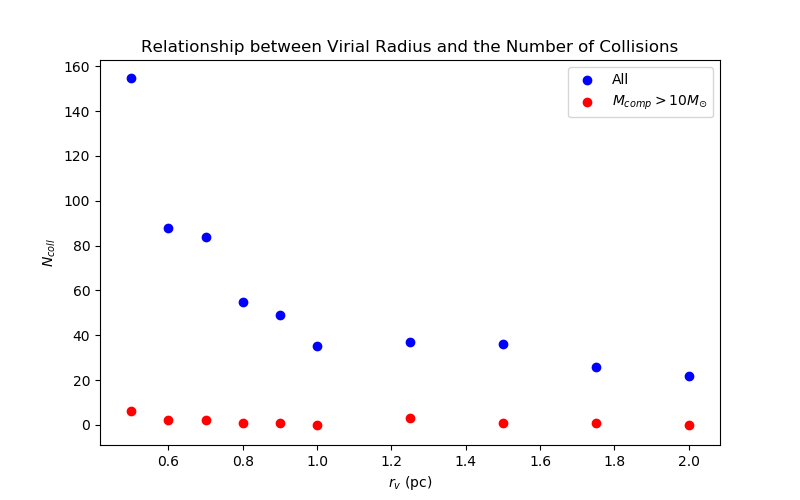

In [21]:
# plot number of collisions vs.virial radius
f,ax = plt.subplots(figsize = (8,5))

# number of collisions
ncoll = [len(time05),len(time06),len(time07),len(time08),len(time09),len(time10),len(time125),len(time150),\
         len(time175),len(time20)]
ncoll = np.array(ncoll)

# finding collisions with companion masses grater than 10 Msun
compMass = [compMass05,compMass06,compMass07,compMass08,compMass09,compMass10,compMass125,compMass150,\
            compMass175,compMass20]
lcompMass = []
for i in range(len(compMass)):
    count = 0
    for val in compMass[i]:
        if val > 10:
            count+=1
    lcompMass.append(count)

rv = [0.5,0.6,0.7,0.8,0.9,1,1.25,1.5,1.75,2]
rv = np.array(rv)

ax.scatter(rv,ncoll,c='b',label='All')
ax.scatter(rv,lcompMass,c='r',label='$M_{comp} > 10 M_{\odot}$')
ax.set_title("Relationship between Virial Radius and the Number of Collisions")
ax.set_xlabel("$r_v$ (pc)")
ax.set_ylabel("$N_{coll}$")
ax.legend()

<IPython.core.display.Javascript object>


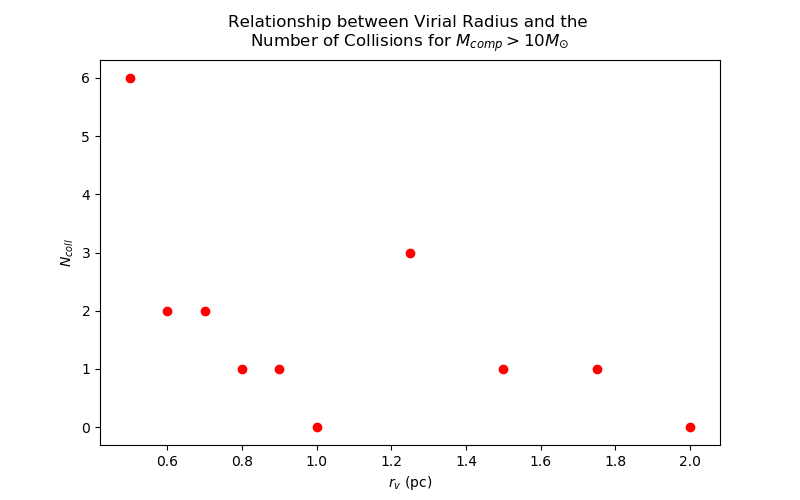

Text(0,0.5,'$N_{coll}$')

In [22]:
f,ax = plt.subplots(figsize = (8,5))
ax.scatter(rv,lcompMass,c='r')

ax.set_title("Relationship between Virial Radius and the \nNumber of Collisions for $M_{comp} > 10 M_{\odot}$")
ax.set_xlabel("$r_v$ (pc)")
ax.set_ylabel("$N_{coll}$")

<IPython.core.display.Javascript object>


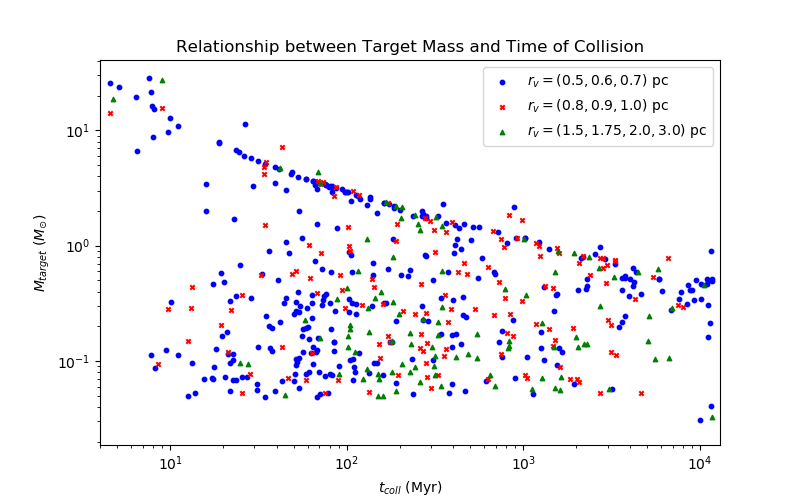

In [13]:
f,ax = plt.subplots(figsize=(8,5))

ax.scatter(compTimepr,compMasspr,c='b',label='$r_v = (0.5,0.6,0.7)$ pc',s=10,marker='o')
ax.scatter(compTimeint,compMassint,c='r',label='$r_v = (0.8,0.9,1.0)$ pc',s=10,marker='x')
ax.scatter(compTimerch,compMassrch,c='g',label='$r_v = (1.5,1.75,2.0,3.0)$ pc',s=10,marker='^')

# t = np.logspace(0.1,4.25,num=100)
# mto = []
# for time in t:
#     mto.append(find_MS_TO(time,0.001,find_MS_turnoff(time)))
# ax.plot(t,mto,label="MS Turnoff Mass")

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_title("Relationship between Target Mass and Time of Collision")
ax.set_xlabel("$t_{coll}$ (Myr)")
ax.set_ylabel("$M_{target}$ ($M_{\odot}$)")
ax.set_xlim(4,13000)
ax.legend()

<IPython.core.display.Javascript object>


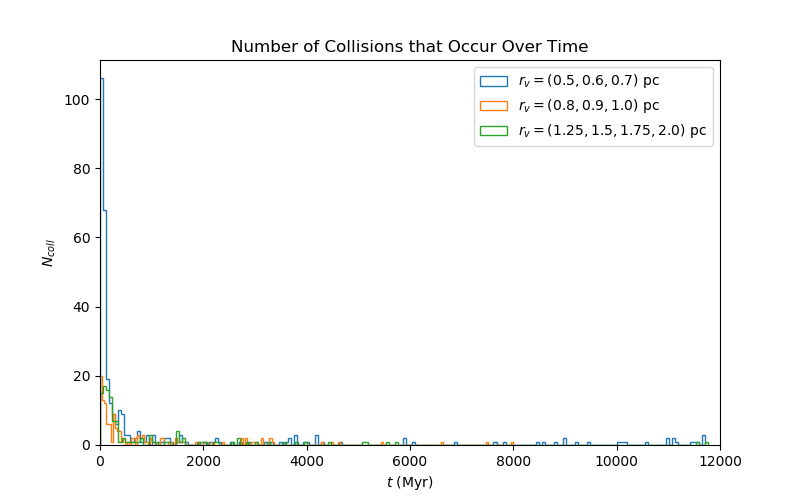

In [24]:
# plot distibution of merger times
f,ax = plt.subplots(figsize = (8,5))

n,bins,patches = ax.hist(timepr,bins = 200,facecolor='blue',histtype='step',\
                         label='$r_v = (0.5,0.6,0.7)$ pc')
n2,bins2,patches2 = ax.hist(timeint,bins = 200,facecolor='red',histtype='step',\
                            label='$r_v = (0.8,0.9,1.0)$ pc')
n3,bins3,patches3 = ax.hist(timerch,bins = 200,facecolor='green',histtype='step',\
                            label='$r_v = (1.25,1.5,1.75,2.0)$ pc')
ax.set_title("Number of Collisions that Occur Over Time")
ax.set_xlabel("$t$ (Myr)")
ax.set_ylabel("$N_{coll}$")
ax.set_xlim(0,12000)
ax.legend()

<IPython.core.display.Javascript object>


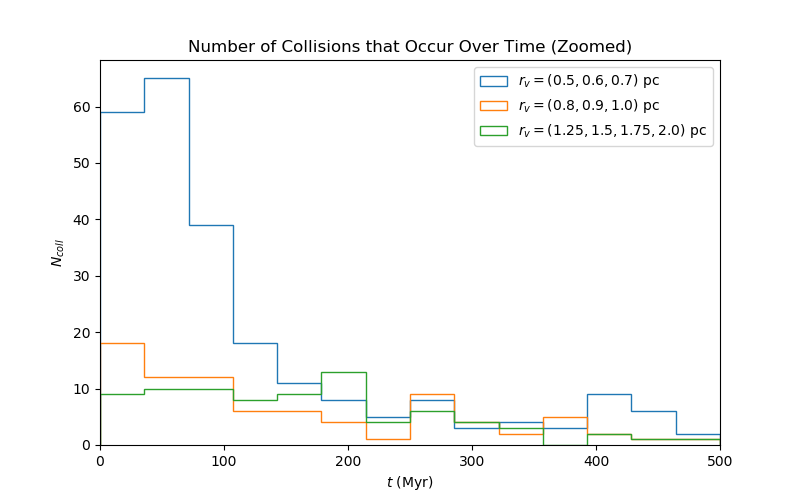

In [25]:
# plot distibution of merger times
f,ax = plt.subplots(figsize = (8,5))

n,bins,patches = ax.hist(timepr,bins = np.linspace(0,500,num=15),facecolor='blue',histtype='step',\
                         label='$r_v = (0.5,0.6,0.7)$ pc')
n2,bins2,patches2 = ax.hist(timeint,bins = np.linspace(0,500,num=15),facecolor='red',histtype='step',\
                            label='$r_v = (0.8,0.9,1.0)$ pc')
n3,bins3,patches3 = ax.hist(timerch,bins = np.linspace(0,500,num=15),facecolor='green',histtype='step',\
                            label='$r_v = (1.25,1.5,1.75,2.0)$ pc')
ax.set_title("Number of Collisions that Occur Over Time (Zoomed)")
ax.set_xlabel("$t$ (Myr)")
ax.set_ylabel("$N_{coll}$")
ax.set_xlim(0,500)
ax.legend()

<IPython.core.display.Javascript object>


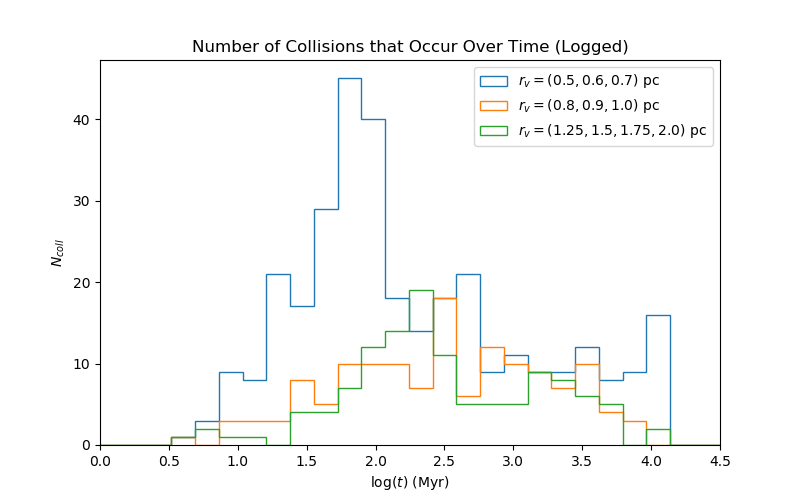

In [26]:
# plot distibution of merger times but logged
f,ax = plt.subplots(figsize = (8,5))

n,bins,patches = ax.hist(np.log10(timepr),bins = np.linspace(0,5,num=30),facecolor='blue',histtype='step',\
                         label='$r_v = (0.5,0.6,0.7)$ pc')
n2,bins2,patches2 = ax.hist(np.log10(timeint),bins = np.linspace(0,5,num=30),facecolor='red',histtype='step',\
                            label='$r_v = (0.8,0.9,1.0)$ pc')
n3,bins3,patches3 = ax.hist(np.log10(timerch),bins = np.linspace(0,5,num=30),facecolor='green',histtype='step',\
                            label='$r_v = (1.25,1.5,1.75,2.0)$ pc')
ax.set_title("Number of Collisions that Occur Over Time (Logged)")
ax.set_xlabel("$\log(t)$ (Myr)")
ax.set_ylabel("$N_{coll}$")
ax.set_xlim(0,4.5)
ax.legend()

<IPython.core.display.Javascript object>


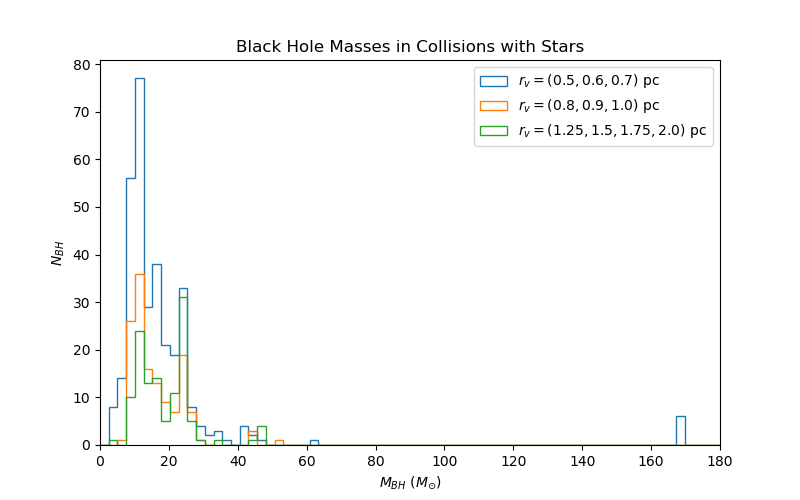

In [27]:
# histogram of bh masses
f,ax = plt.subplots(figsize = (8,5))

n,bins,patches = ax.hist(bhMasspr,bins = np.linspace(0,180,num=72),facecolor='blue',histtype='step',\
                         label='$r_v = (0.5,0.6,0.7)$ pc')
n2,bins2,patches2 = ax.hist(bhMassint,bins = np.linspace(0,180,num=72),facecolor='red',histtype='step',\
                           label='$r_v = (0.8,0.9,1.0)$ pc')
n3,bins3,patches3 = ax.hist(bhMassrch,bins = np.linspace(0,180,num=72),facecolor='green',histtype='step',\
                           label='$r_v = (1.25,1.5,1.75,2.0)$ pc')
ax.set_title("Black Hole Masses in Collisions with Stars")
ax.set_xlabel("$M_{BH}$ ($M_{\odot}$)")
ax.set_ylabel("$N_{BH}$")
ax.set_xlim(0,180)
ax.legend()

<IPython.core.display.Javascript object>


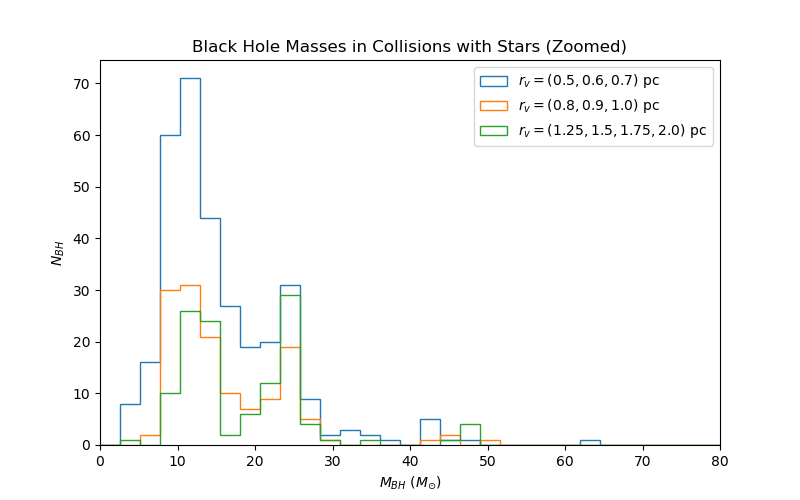

In [28]:
# histogram of bh masses
f,ax = plt.subplots(figsize = (8,5))

n,bins,patches = ax.hist(bhMasspr,bins = np.linspace(0,80,num=32),facecolor='blue',histtype='step',\
                         label='$r_v = (0.5,0.6,0.7)$ pc')
n2,bins2,patches2 = ax.hist(bhMassint,bins = np.linspace(0,80,num=32),facecolor='red',histtype='step',\
                           label='$r_v = (0.8,0.9,1.0)$ pc')
n3,bins3,patches3 = ax.hist(bhMassrch,bins = np.linspace(0,80,num=32),facecolor='green',histtype='step',\
                           label='$r_v = (1.25,1.5,1.75,2.0)$ pc')
ax.set_title("Black Hole Masses in Collisions with Stars (Zoomed)")
ax.set_xlabel("$M_{BH}$ ($M_{\odot}$)")
ax.set_ylabel("$N_{BH}$")
ax.set_xlim(0,80)
ax.legend()

<IPython.core.display.Javascript object>


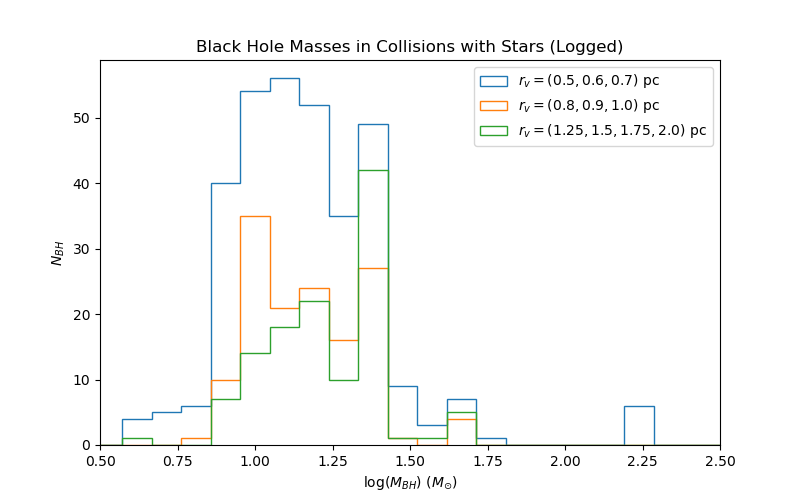

In [29]:
# histogram of bh masses
f,ax = plt.subplots(figsize = (8,5))

n,bins,patches = ax.hist(np.log10(bhMasspr),bins = np.linspace(0,6,num=64),facecolor='blue',histtype='step',\
                        label='$r_v = (0.5,0.6,0.7)$ pc')
n2,bins2,patches2 = ax.hist(np.log10(bhMassint),bins = np.linspace(0,6,num=64),facecolor='red',histtype='step',\
                           label='$r_v = (0.8,0.9,1.0)$ pc')
n3,bins3,patches3 = ax.hist(np.log10(bhMassrch),bins = np.linspace(0,6,num=64),facecolor='green',histtype='step',\
                           label='$r_v = (1.25,1.5,1.75,2.0)$ pc')
ax.set_title("Black Hole Masses in Collisions with Stars (Logged)")
ax.set_xlabel("$\log(M_{BH})$ ($M_{\odot}$)")
ax.set_ylabel("$N_{BH}$")
ax.set_xlim(0.5,2.5)
ax.legend()

<IPython.core.display.Javascript object>


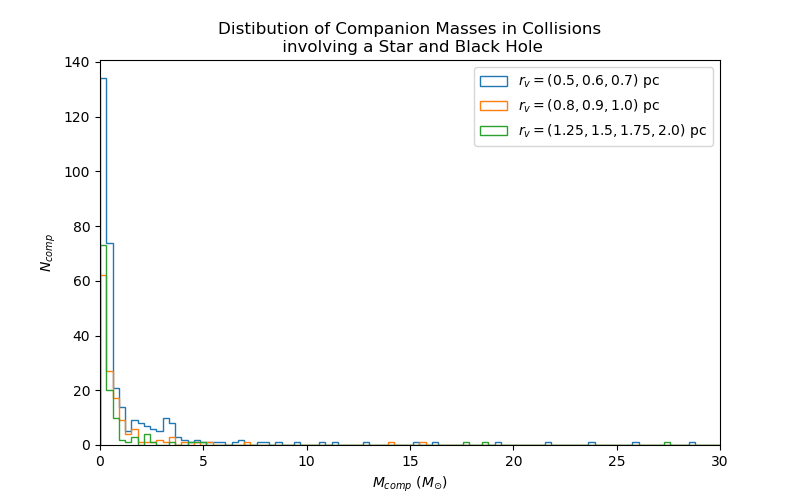

In [30]:
# histogram of companions
f,ax = plt.subplots(figsize = (8,5))

n,bins,patches = ax.hist(compMasspr,bins = np.linspace(0,30,num=100),facecolor='blue',histtype='step',\
                        label='$r_v = (0.5,0.6,0.7)$ pc')
n2,bins2,patches2 = ax.hist(compMassint,bins = np.linspace(0,30,num=100),facecolor='red',histtype='step',\
                           label='$r_v = (0.8,0.9,1.0)$ pc')
n3,bins3,patches3 = ax.hist(compMassrch,bins = np.linspace(0,30,num=100),facecolor='red',histtype='step',\
                           label='$r_v = (1.25,1.5,1.75,2.0)$ pc')
ax.set_title("Distibution of Companion Masses in Collisions\n involving a Star and Black Hole")
ax.set_xlabel("$M_{comp}$ ($M_{\odot}$)")
ax.set_ylabel("$N_{comp}$")
ax.set_xlim(0,30)
ax.legend()

<IPython.core.display.Javascript object>


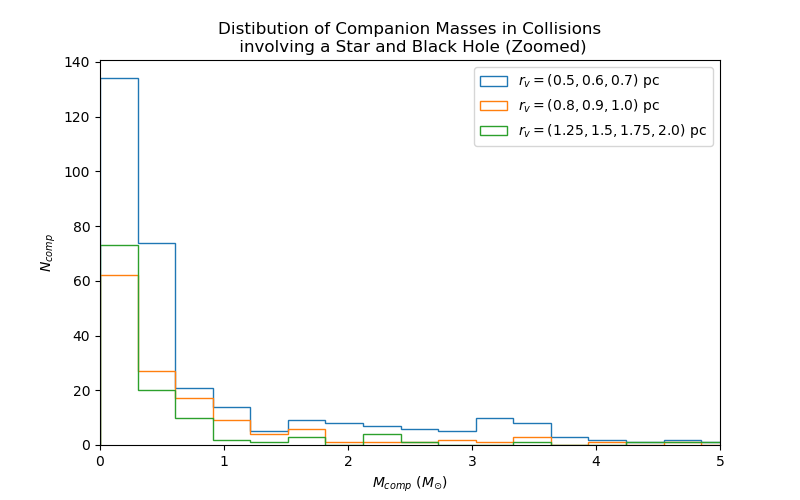

In [31]:
# histogram of companions
f,ax = plt.subplots(figsize = (8,5))

n,bins,patches = ax.hist(compMasspr,bins = np.linspace(0,30,num=100),facecolor='blue',histtype='step',\
                        label='$r_v = (0.5,0.6,0.7)$ pc')
n2,bins2,patches2 = ax.hist(compMassint,bins = np.linspace(0,30,num=100),facecolor='red',histtype='step',\
                           label='$r_v = (0.8,0.9,1.0)$ pc')
n3,bins3,patches3 = ax.hist(compMassrch,bins = np.linspace(0,30,num=100),facecolor='red',histtype='step',\
                           label='$r_v = (1.25,1.5,1.75,2.0)$ pc')
ax.set_title("Distibution of Companion Masses in Collisions\n involving a Star and Black Hole (Zoomed)")
ax.set_xlabel("$M_{comp}$ ($M_{\odot}$)")
ax.set_ylabel("$N_{comp}$")
ax.set_xlim(0,5)
ax.legend()

<IPython.core.display.Javascript object>


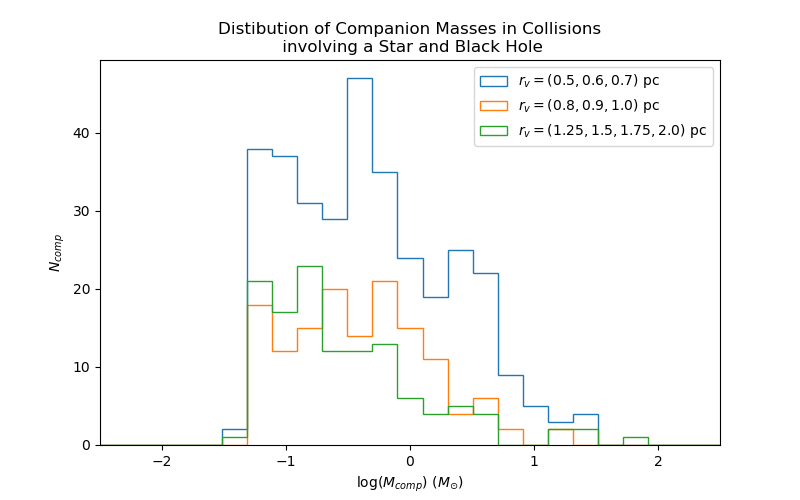

In [32]:
# histogram of companions
f,ax = plt.subplots(figsize = (8,5))

n,bins,patches = ax.hist(np.log10(compMasspr),bins = np.linspace(-10,10,num=100),facecolor='blue',histtype='step',\
                        label='$r_v = (0.5,0.6,0.7)$ pc')
n2,bins2,patches2 = ax.hist(np.log10(compMassint),bins = np.linspace(-10,10,num=100),facecolor='red',histtype='step',\
                           label='$r_v = (0.8,0.9,1.0)$ pc')
n3,bins3,patches3 = ax.hist(np.log10(compMassrch),bins = np.linspace(-10,10,num=100),facecolor='red',histtype='step',\
                           label='$r_v = (1.25,1.5,1.75,2.0)$ pc')
ax.set_title("Distibution of Companion Masses in Collisions\n involving a Star and Black Hole")
ax.set_xlabel("$\log(M_{comp})$ ($M_{\odot}$)")
ax.set_ylabel("$N_{comp}$")
ax.set_xlim(-2.5,2.5)
ax.legend()

<IPython.core.display.Javascript object>


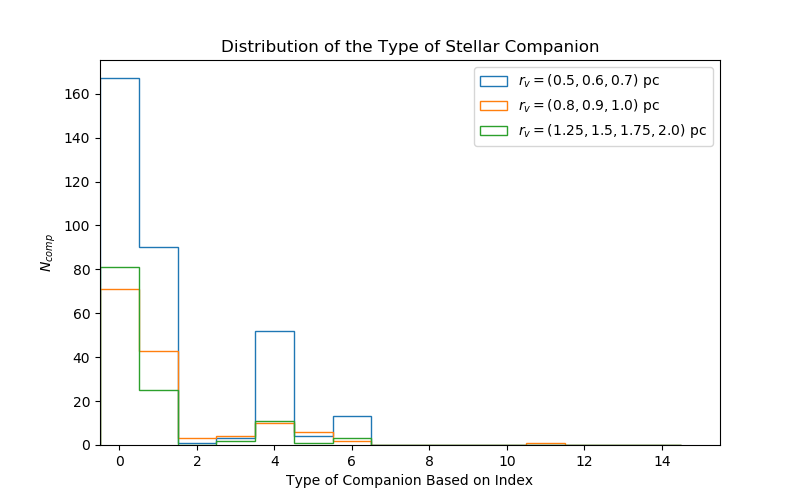

In [33]:
f,ax = plt.subplots(figsize = (8,5))

n,bins,patches = ax.hist(compTypepr,bins = np.linspace(0,15,num=16),facecolor='blue',align='left',histtype='step',\
                        label='$r_v = (0.5,0.6,0.7)$ pc')
n2,bins2,patches2 = ax.hist(compTypeint,bins = np.linspace(0,15,num=16),facecolor='red',align='left',histtype='step',\
                           label='$r_v = (0.8,0.9,1.0)$ pc')
n3,bins3,patches3 = ax.hist(compTyperch,bins = np.linspace(0,15,num=16),facecolor='green',align='left',histtype='step',\
                           label='$r_v = (1.25,1.5,1.75,2.0)$ pc')
ax.set_title("Distribution of the Type of Stellar Companion")
ax.set_xlabel("Type of Companion Based on Index")
ax.set_ylabel("$N_{comp}$")
ax.set_xlim(-0.5,15.5)
ax.legend()

<IPython.core.display.Javascript object>


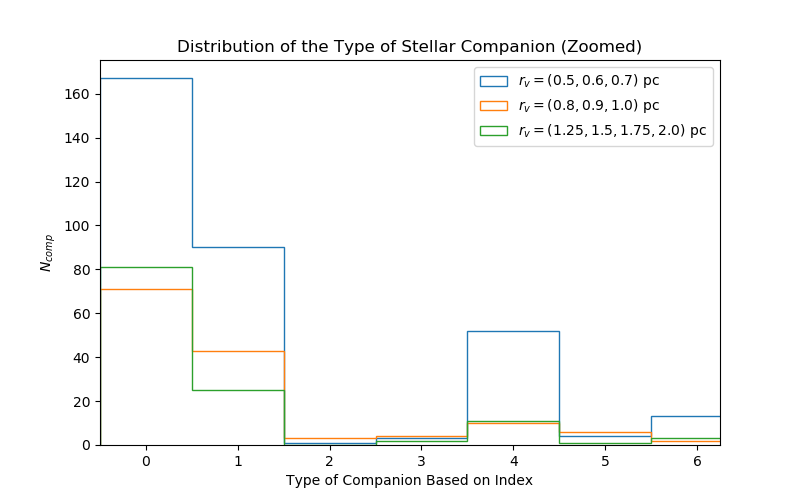

In [34]:
f,ax = plt.subplots(figsize = (8,5))

n,bins,patches = ax.hist(compTypepr,bins = np.linspace(0,15,num=16),facecolor='blue',align='left',histtype='step',\
                        label='$r_v = (0.5,0.6,0.7)$ pc')
n2,bins2,patches2 = ax.hist(compTypeint,bins = np.linspace(0,15,num=16),facecolor='red',align='left',histtype='step',\
                           label='$r_v = (0.8,0.9,1.0)$ pc')
n3,bins3,patches3 = ax.hist(compTyperch,bins = np.linspace(0,15,num=16),facecolor='green',align='left',histtype='step',\
                           label='$r_v = (1.25,1.5,1.75,2.0)$ pc')
ax.set_title("Distribution of the Type of Stellar Companion (Zoomed)")
ax.set_xlabel("Type of Companion Based on Index")
ax.set_ylabel("$N_{comp}$")
ax.set_xlim(-0.5,6.25)
ax.legend()

<IPython.core.display.Javascript object>


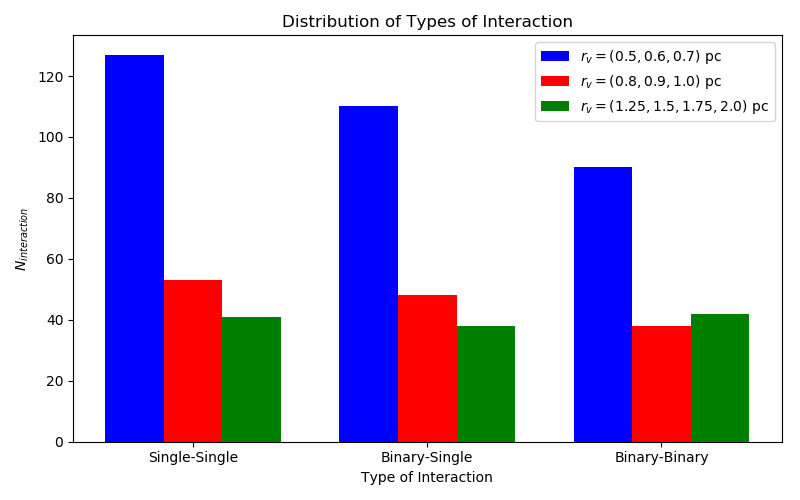

In [35]:
# data to plot
n_groups = 3
intpr = (sspr,bspr,bbpr)
intint = (ssint,bsint,bbint)
intrch = (ssrch,bsrch,bbrch)
 
# create plot
fig, ax = plt.subplots(figsize=(8,5))
index = np.arange(n_groups)
bar_width = 0.25
opacity = 1
 
rects1 = plt.bar(index, intpr, bar_width,
                 alpha=opacity,
                 color='b',
                 label='$r_v = (0.5,0.6,0.7)$ pc')
 
rects2 = plt.bar(index + bar_width, intint, bar_width,
                 alpha=opacity,
                 color='r',
                 label='$r_v = (0.8,0.9,1.0)$ pc')

rects3 = plt.bar(index + 2*bar_width,intrch, bar_width,alpha=opacity,color='g',label='$r_v = (1.25,1.5,1.75,2.0)$ pc')
 
plt.xlabel('Type of Interaction')
plt.ylabel('$N_{interaction}$')
plt.title('Distribution of Types of Interaction')
plt.xticks(index + bar_width, ('Single-Single', 'Binary-Single', 'Binary-Binary'))
plt.legend()

plt.tight_layout()
plt.show()

In [13]:
# open files
rv3e605 = open("data/binfrac100/initial3e6.collision0.5.log")
rv3e620 = open("data/binfrac100/initial3e6.collision2.log")
rv8e505 = open("data/binfrac100/initial8e5.collision0.5.log")
rv8e520 = open("data/binfrac100/initial8e5.collision2.log")
rv3e605out = open("data/binfrac100/bhstar3e6.collision0.5.log",mode='w')
rv3e620out = open("data/binfrac100/bhstar3e6.collision2.log",mode='w')
rv8e505out = open("data/binfrac100/bhstar8e5.collision0.5.log",mode='w')
rv8e520out = open("data/binfrac100/bhstar8e5.collision2.log",mode='w')

In [14]:
# extract data
extractData(rv3e605,rv3e605out)
extractData(rv3e620,rv3e620out)
extractData(rv8e505,rv8e505out)
extractData(rv8e520,rv8e520out)

In [15]:
# close all files
rv3e605.close()
rv3e620.close()
rv8e505.close()
rv8e520.close()
rv3e605out.close()
rv3e620out.close()
rv8e505out.close()
rv8e520out.close()

In [16]:
# reopen needed files for reading
rv3e605out = open("data/binfrac100/bhstar3e6.collision0.5.log")
rv3e620out = open("data/binfrac100/bhstar3e6.collision2.log")
rv8e505out = open("data/binfrac100/bhstar8e5.collision0.5.log")
rv8e520out = open("data/binfrac100/bhstar8e5.collision2.log")
conv3e605 = open("data/binfrac100/initial3e6.conv0.5.sh")
conv3e620 = open("data/binfrac100/initial3e6.conv2.sh")
conv8e505 = open("data/binfrac100/initial8e5.conv0.5.sh")
conv8e520 = open("data/binfrac100/initial8e5.conv2.sh")

In [17]:
time3e605,bhMass3e605,compMass3e605,compType3e605,ss3e605,bs3e605,bb3e605,compTime3e605 = \
findSysInfo(rv3e605out,conv3e605)
time3e620,bhMass3e620,compMass3e620,compType3e620,ss3e620,bs3e620,bb3e620,compTime3e620 = \
findSysInfo(rv3e620out,conv3e620)
time8e505,bhMass8e505,compMass8e505,compType8e505,ss8e505,bs8e505,bb8e505,compTime8e505 = \
findSysInfo(rv8e505out,conv8e505)
time8e520,bhMass8e520,compMass8e520,compType8e520,ss8e520,bs8e520,bb8e520,compTime8e520 = \
findSysInfo(rv8e520out,conv8e520)

[1074.62, 0.679255]
[8597.62, 0.679255]
[636.084, 0.680245]
[5089.05, 0.680245]


In [18]:
#close files
rv3e605out.close()
rv3e620out.close()
rv8e505out.close()
rv8e520out.close()
conv3e605.close()
conv3e620.close()
conv8e505.close()
conv8e520.close()

<IPython.core.display.Javascript object>


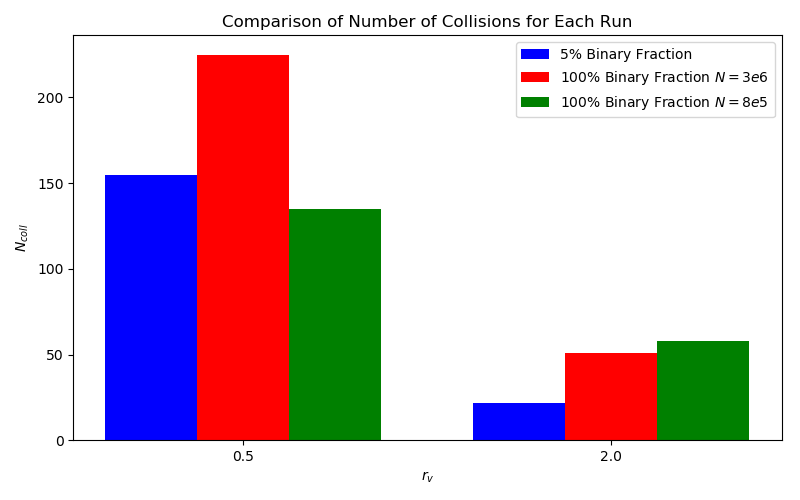

In [82]:
# data to plot
n_groups = 2
intpr = (len(time05),len(time20))
intint = (len(time3e605),len(time3e620))
intrch = (len(time8e505),len(time8e520))
 
# create plot
f,ax = plt.subplots(figsize=(8,5))
index = np.arange(n_groups)
bar_width = 0.25
opacity = 1
 
rects1 = plt.bar(index, intpr, bar_width,
                 alpha=opacity,
                 color='b',
                 label='5% Binary Fraction')
 
rects2 = plt.bar(index + bar_width, intint, bar_width,
                 alpha=opacity,
                 color='r',
                 label='100% Binary Fraction $N=3e6$')

rects2 = plt.bar(index + 2*bar_width, intrch, bar_width,
                 alpha=opacity,
                 color='g',
                 label='100% Binary Fraction $N=8e5$')
 
plt.xlabel('$r_v$')
plt.ylabel('$N_{coll}$')
plt.title('Comparison of Number of Collisions for Each Run')
plt.xticks(index + bar_width, ('0.5', '2.0'))
plt.legend()

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


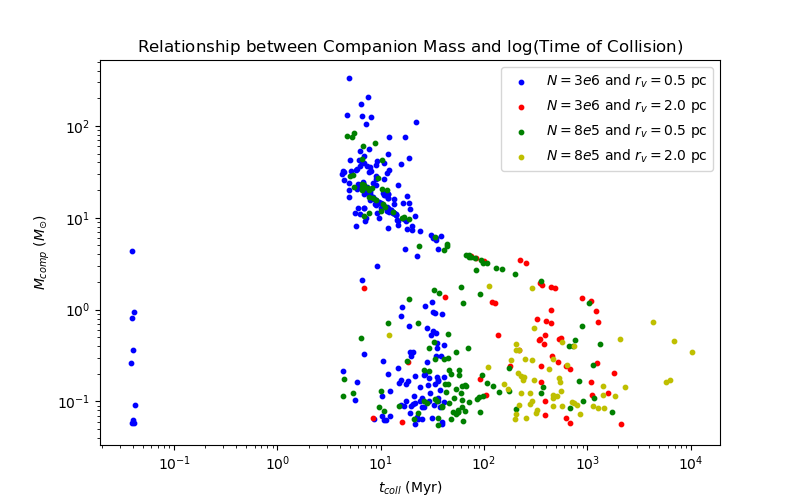

In [117]:
f,ax = plt.subplots(figsize=(8,5))


ax.scatter(compTime3e605,compMass3e605,c='b',label='$N = 3e6$ and $r_v=0.5$ pc',s=10)
ax.scatter(compTime3e620,compMass3e620,c='r',label='$N = 3e6$ and $r_v=2.0$ pc',s=10)
ax.scatter(compTime8e505,compMass8e505,c='g',label='$N = 8e5$ and $r_v=0.5$ pc',s=10)
ax.scatter(compTime8e520,compMass8e520,c='y',label='$N = 8e5$ and $r_v=2.0$ pc',s=10)

# ax.scatter(np.log10(compTime3e605),np.log10(compMass3e605),c='b',label='$N = 3e6$ and $r_v=0.5$ pc',s=10)
# ax.scatter(np.log10(compTime3e620),np.log10(compMass3e620),c='r',label='$N = 3e6$ and $r_v=2.0$ pc',s=10)
# ax.scatter(np.log10(compTime8e505),np.log10(compMass8e505),c='g',label='$N = 8e5$ and $r_v=0.5$ pc',s=10)
# ax.scatter(np.log10(compTime8e520),np.log10(compMass8e520),c='y',label='$N = 8e5$ and $r_v=2.0$ pc',s=10)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title("Relationship between Companion Mass and $\log$(Time of Collision)")
ax.set_xlabel("$t_{coll}$ (Myr)")
ax.set_ylabel("$M_{comp}$ ($M_{\odot}$)")
ax.legend()

In [19]:
def find_MS_turnoff(t):
        """given the time in Myr it finds the MS turn-off mass in Solar masses.  Very simple now.\
        Need to make the MS lifetime formula better. """
        t_yr = t*10**6
        lm = (9.921 - np.log10(t_yr))/3.6648
        m = 10**lm
        return m
    
def find_t_ms(z, m):
        eta = np.log10(z/0.02)
        a1 = 1.593890e3+2.053038e3*eta+1.231226e3*eta**2.+2.327785e2*eta**3.
        a2 = 2.706708e3+ 1.483131e3*eta+ 5.772723e2*eta**2.+ 7.411230e1*eta**3.
        a3 = 1.466143e2 - 1.048442e2*eta - 6.795374e1*eta**2. - 1.391127e1*eta**3.
        a4 = 4.141960e-2 + 4.564888e-2*eta + 2.958542e-2*eta**2 + 5.571483e-3*eta**3.
        a5 = 3.426349e-1
        a6 = 1.949814e1 + 1.758178*eta - 6.008212*eta**2. - 4.470533*eta**3.
        a7 = 4.903830
        a8 = 5.212154e-2 + 3.166411e-2*eta - 2.750074e-3*eta**2. - 2.271549e-3*eta**3.
        a9 = 1.312179 - 3.294936e-1*eta + 9.231860e-2*eta**2. + 2.610989e-2*eta**3.
        a10 = 8.073972e-1

        m_hook = 1.0185 + 0.16015*eta + 0.0892*eta**2.
        m_HeF = 1.995 + 0.25*eta + 0.087*eta**2.
        m_FGB = 13.048*(z/0.02)**0.06/(1+0.0012*(0.02/z)**1.27)

        t_BGB = (a1+a2*m**4.+a3*m**5.5+m**7.)/(a4*m**2.+a5*m**7.)
        x = max([0.95,min([0.95-0.03*(eta+0.30103)]),0.99])
        mu = max(0.5, 1.0-0.01* max(a6/(m**a7) , a8+a9/m**a10))
        t_hook = mu*t_BGB

        t_MS = max(t_hook, x*t_BGB)

        return (t_MS)
    
def find_MS_TO(t, z, mguess):
        tguess = find_t_ms(z, mguess)
        #print mguess, tguess, (t-tguess)/t

        while abs((t-tguess)/t) > 0.0005:
                if (t-tguess)/t > 0.0005:
                        mguess -= 0.0001
                if (t-tguess)/t < 0.0005:
                        mguess += 0.0001
                tguess = find_t_ms(z, mguess)
                #print mguess, tguess, (t-tguess)/t
        mto = mguess
        return mto

In [20]:
isMS3e605Time = []
isMS3e605Mass = []
isMS3e620Time = []
isMS3e620Mass = []
isMS8e505Time = []
isMS8e505Mass = []
isMS8e520Time = []
isMS8e520Mass = []

# for elem in isMS3e605:
#     isMS3e605Time.append(elem[0])
#     isMS3e605Mass.append(elem[1])
# for elem in isMS3e620:
#     isMS3e620Time.append(elem[0])
#     isMS3e620Mass.append(elem[1])
# for elem in isMS8e505:
#     isMS8e505Time.append(elem[0])
#     isMS8e505Mass.append(elem[1])
# for elem in isMS8e520:
#     isMS8e520Time.append(elem[0])
#     isMS8e520Mass.append(elem[1])

for i in range(len(compType3e605)):
    if compType3e605[i] == 0 or compType3e605[i] == 1:
        isMS3e605Time.append(compTime3e605[i])
        isMS3e605Mass.append(compMass3e605[i])
for i in range(len(compType3e620)):
    if compType3e620[i] == 0 or compType3e620[i] == 1:
        isMS3e620Time.append(compTime3e620[i])
        isMS3e620Mass.append(compMass3e620[i])
for i in range(len(compType8e505)):
    if compType8e505[i] == 0 or compType8e505[i] == 1:
        isMS8e505Time.append(compTime8e505[i])
        isMS8e505Mass.append(compMass8e505[i])
for i in range(len(compType8e520)):
    if compType8e520[i] == 0 or compType8e520[i] == 1:
        isMS8e520Time.append(compTime8e520[i])
        isMS8e520Mass.append(compMass8e520[i])

print(isMSTime3e605)

NameError: name 'isMSTime3e605' is not defined

<IPython.core.display.Javascript object>


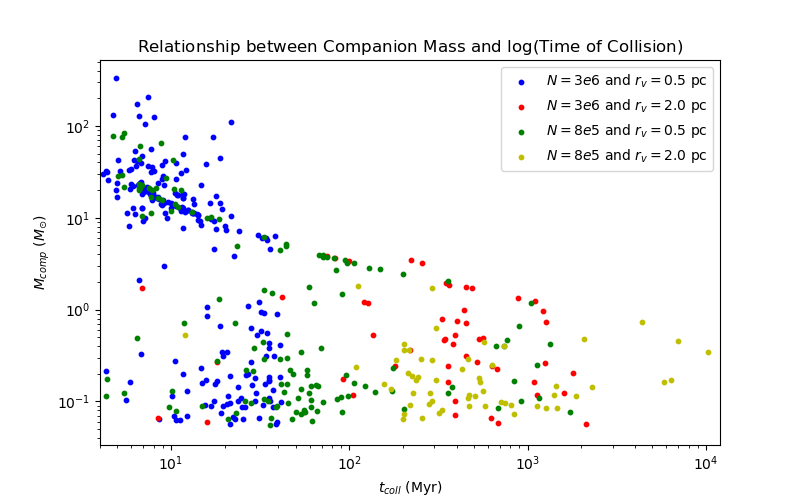

In [24]:
f,ax = plt.subplots(figsize=(8,5))
ax.scatter(compTime3e605,compMass3e605,c='b',label='$N = 3e6$ and $r_v=0.5$ pc',s=10)
ax.scatter(compTime3e620,compMass3e620,c='r',label='$N = 3e6$ and $r_v=2.0$ pc',s=10)
ax.scatter(compTime8e505,compMass8e505,c='g',label='$N = 8e5$ and $r_v=0.5$ pc',s=10)
ax.scatter(compTime8e520,compMass8e520,c='y',label='$N = 8e5$ and $r_v=2.0$ pc',s=10)

# t = np.logspace(0.5,4.25,num=100)
# mto = []
# for time in t:
#     mto.append(find_MS_TO(time,0.001,find_MS_turnoff(time)))
# ax.plot(t,mto,label="MS Turnoff Mass")

# ax.plot(np.log10(mtoline[0]),np.log10(mtoline[1]))

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title("Relationship between Companion Mass and $\log$(Time of Collision)")
ax.set_xlabel("$t_{coll}$ (Myr)")
ax.set_ylabel("$M_{comp}$ ($M_{\odot}$)")
ax.set_xlim(4,12000)
ax.legend()

<IPython.core.display.Javascript object>


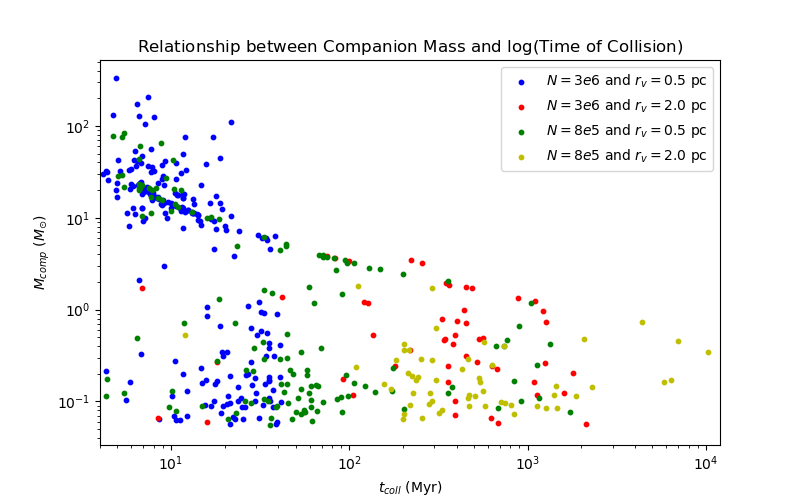

In [28]:
f,ax = plt.subplots(figsize=(8,5))

# ax.scatter(isMSTime3e605,isMSMass3e605,c='b',label='$N = 3e6$ and $r_v=0.5$ pc',s=10)
# ax.scatter(isMSTime3e620,isMSMass3e620,c='r',label='$N = 3e6$ and $r_v=2.0$ pc',s=10)
# ax.scatter(isMSTime8e505,isMSMass8e505,c='g',label='$N = 8e5$ and $r_v=0.5$ pc',s=10)
# ax.scatter(isMSTime8e520,isMSMass8e520,c='y',label='$N = 8e5$ and $r_v=2.0$ pc',s=10)

# ax.scatter(compTime3e605,compMass3e605,c='b',label='$N = 3e6$ and $r_v=0.5$ pc',s=10)
# ax.scatter(compTime3e620,compMass3e620,c='r',label='$N = 3e6$ and $r_v=2.0$ pc',s=10)
# ax.scatter(compTime8e505,compMass8e505,c='g',label='$N = 8e5$ and $r_v=0.5$ pc',s=10)
# ax.scatter(compTime8e520,compMass8e520,c='y',label='$N = 8e5$ and $r_v=2.0$ pc',s=10)

ax.scatter(compTime3e605,compMass3e605,c='b',label='$N = 3e6$ and $r_v=0.5$ pc',s=10)
ax.scatter(compTime3e620,compMass3e620,c='r',label='$N = 3e6$ and $r_v=2.0$ pc',s=10)
ax.scatter(compTime8e505,compMass8e505,c='g',label='$N = 8e5$ and $r_v=0.5$ pc',s=10)
ax.scatter(compTime8e520,compMass8e520,c='y',label='$N = 8e5$ and $r_v=2.0$ pc',s=10)

t = np.logspace(0.5,4.25,num=100)
mto = []
for time in t:
    mto.append(find_MS_TO(time,0.001,find_MS_turnoff(time)))

# mto = find_MS_TO(t,0.001,find_MS_turnoff(t))

# ax.plot(t,mto,label="MS Turnoff Mass")

# ax.plot(np.log10(mtoline[0]),np.log10(mtoline[1]))

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title("Relationship between Companion Mass and $\log$(Time of Collision)")
ax.set_xlabel("$t_{coll}$ (Myr)")
ax.set_ylabel("$M_{comp}$ ($M_{\odot}$)")
ax.set_xlim(4,12000)
ax.legend()

<IPython.core.display.Javascript object>


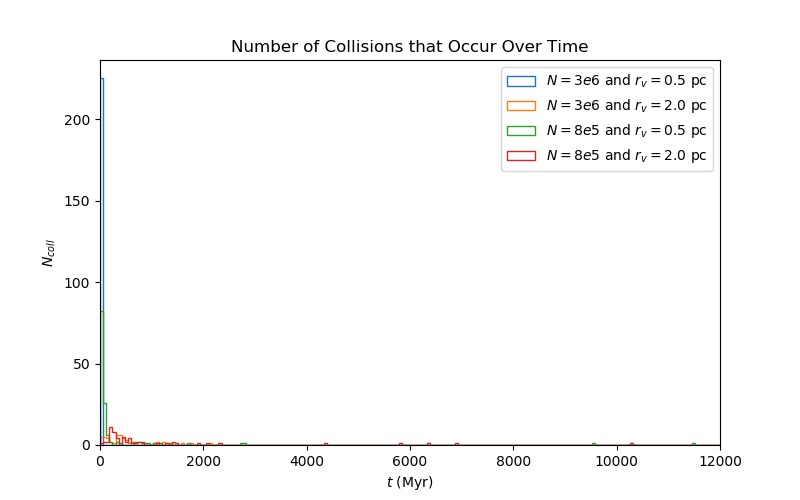

In [84]:
# plot distibution of merger times
f,ax = plt.subplots(figsize = (8,5))

n,bins,patches = ax.hist(time3e605,bins = np.linspace(0,12000,num = 200),facecolor='blue',histtype='step',\
                         label='$N = 3e6$ and $r_v=0.5$ pc')
n2,bins2,patches2 = ax.hist(time3e620,bins = np.linspace(0,12000,num = 200),facecolor='red',histtype='step',\
                            label='$N = 3e6$ and $r_v=2.0$ pc')
n3,bins3,patches3 = ax.hist(time8e505,bins = np.linspace(0,12000,num = 200),facecolor='green',histtype='step',\
                            label='$N = 8e5$ and $r_v=0.5$ pc')
n4,bins4,patches4 = ax.hist(time8e520,bins = np.linspace(0,12000,num = 200),facecolor='yellow',histtype='step',\
                            label='$N = 8e5$ and $r_v=2.0$ pc')
ax.set_title("Number of Collisions that Occur Over Time")
ax.set_xlabel("$t$ (Myr)")
ax.set_ylabel("$N_{coll}$")
ax.set_xlim(0,12000)
ax.legend()

<IPython.core.display.Javascript object>


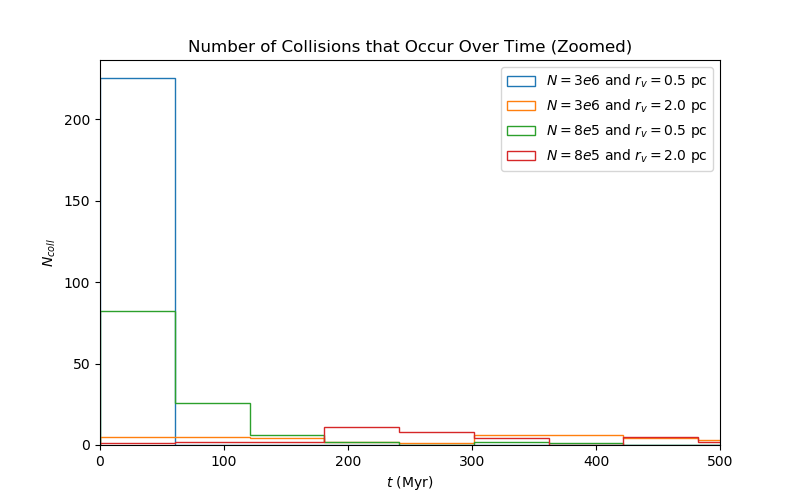

In [85]:
# plot distibution of merger times
f,ax = plt.subplots(figsize = (8,5))

n,bins,patches = ax.hist(time3e605,bins = np.linspace(0,12000,num = 200),facecolor='blue',histtype='step',\
                         label='$N = 3e6$ and $r_v=0.5$ pc')
n2,bins2,patches2 = ax.hist(time3e620,bins = np.linspace(0,12000,num = 200),facecolor='red',histtype='step',\
                            label='$N = 3e6$ and $r_v=2.0$ pc')
n3,bins3,patches3 = ax.hist(time8e505,bins = np.linspace(0,12000,num = 200),facecolor='green',histtype='step',\
                            label='$N = 8e5$ and $r_v=0.5$ pc')
n4,bins4,patches4 = ax.hist(time8e520,bins = np.linspace(0,12000,num = 200),facecolor='yellow',histtype='step',\
                            label='$N = 8e5$ and $r_v=2.0$ pc')
ax.set_title("Number of Collisions that Occur Over Time (Zoomed)")
ax.set_xlabel("$t$ (Myr)")
ax.set_ylabel("$N_{coll}$")
ax.set_xlim(0,500)
ax.legend()

<IPython.core.display.Javascript object>


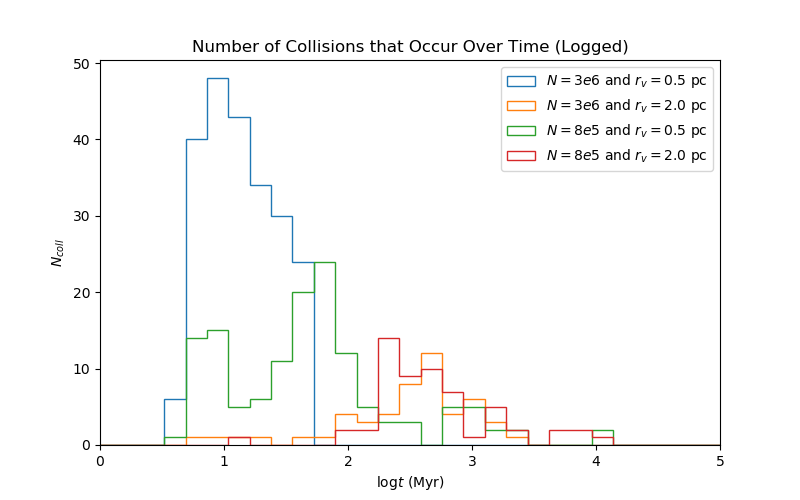

In [86]:
# plot distibution of merger times
f,ax = plt.subplots(figsize = (8,5))

n,bins,patches = ax.hist(np.log10(time3e605),bins = np.linspace(0,5,num = 30),facecolor='blue',histtype='step',\
                         label='$N = 3e6$ and $r_v=0.5$ pc')
n2,bins2,patches2 = ax.hist(np.log10(time3e620),bins = np.linspace(0,5,num = 30),facecolor='red',histtype='step',\
                            label='$N = 3e6$ and $r_v=2.0$ pc',)
n3,bins3,patches3 = ax.hist(np.log10(time8e505),bins = np.linspace(0,5,num = 30),facecolor='green',histtype='step',\
                            label='$N = 8e5$ and $r_v=0.5$ pc')
n4,bins4,patches4 = ax.hist(np.log10(time8e520),bins = np.linspace(0,5,num = 30),facecolor='yellow',histtype='step',\
                            label='$N = 8e5$ and $r_v=2.0$ pc')
ax.set_title("Number of Collisions that Occur Over Time (Logged)")
ax.set_xlabel("$\log{t}$ (Myr)")
ax.set_ylabel("$N_{coll}$")
ax.set_xlim(0,5)
ax.legend()

/home/mitchello457/Anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


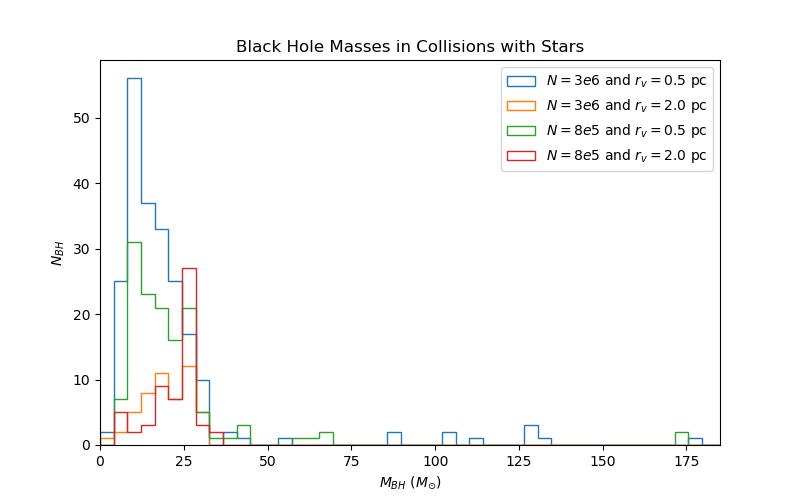

In [87]:
# histogram of bh masses
f,ax = plt.subplots(figsize = (8,5))

n,bins,patches = ax.hist(bhMass3e605,bins = np.linspace(0,200,num = 50),facecolor='blue',histtype='step',\
                         label='$N = 3e6$ and $r_v=0.5$ pc')
n2,bins2,patches2 = ax.hist(bhMass3e620,bins = np.linspace(0,200,num = 50),facecolor='red',histtype='step',\
                            label='$N = 3e6$ and $r_v=2.0$ pc',)
n3,bins3,patches3 = ax.hist(bhMass8e505,bins = np.linspace(0,200,num = 50),facecolor='green',histtype='step',\
                            label='$N = 8e5$ and $r_v=0.5$ pc')
n4,bins4,patches4 = ax.hist(bhMass8e520,bins = np.linspace(0,200,num = 50),facecolor='yellow',histtype='step',\
                            label='$N = 8e5$ and $r_v=2.0$ pc')
ax.set_title("Black Hole Masses in Collisions with Stars")
ax.set_xlabel("$M_{BH}$ ($M_{\odot}$)")
ax.set_ylabel("$N_{BH}$")
ax.set_xlim(0,185)
ax.legend()

/home/mitchello457/Anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


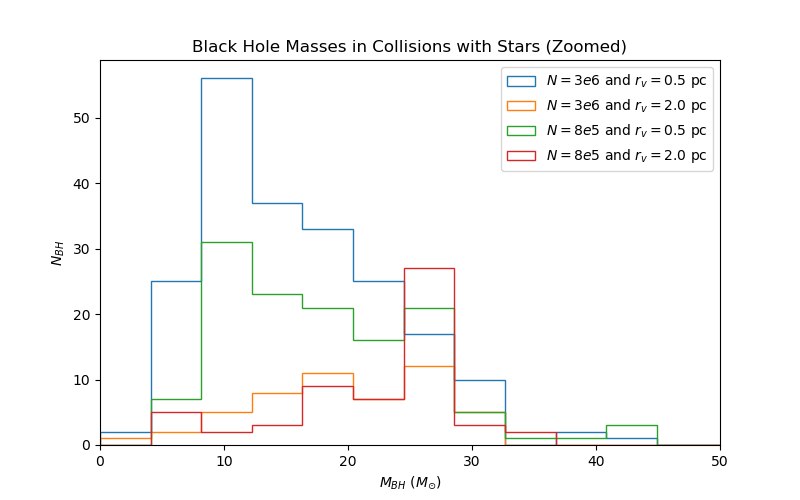

In [88]:
# histogram of bh masses
f,ax = plt.subplots(figsize = (8,5))

n,bins,patches = ax.hist(bhMass3e605,bins = np.linspace(0,200,num = 50),facecolor='blue',histtype='step',\
                         label='$N = 3e6$ and $r_v=0.5$ pc')
n2,bins2,patches2 = ax.hist(bhMass3e620,bins = np.linspace(0,200,num = 50),facecolor='red',histtype='step',\
                            label='$N = 3e6$ and $r_v=2.0$ pc',)
n3,bins3,patches3 = ax.hist(bhMass8e505,bins = np.linspace(0,200,num = 50),facecolor='green',histtype='step',\
                            label='$N = 8e5$ and $r_v=0.5$ pc')
n4,bins4,patches4 = ax.hist(bhMass8e520,bins = np.linspace(0,200,num = 50),facecolor='yellow',histtype='step',\
                            label='$N = 8e5$ and $r_v=2.0$ pc')
ax.set_title("Black Hole Masses in Collisions with Stars (Zoomed)")
ax.set_xlabel("$M_{BH}$ ($M_{\odot}$)")
ax.set_ylabel("$N_{BH}$")
ax.set_xlim(0,50)
ax.legend()

/home/mitchello457/Anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


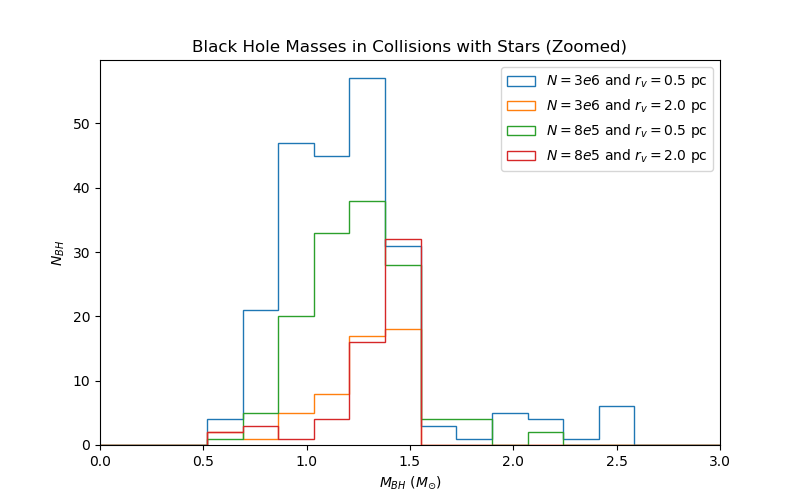

In [89]:
# histogram of bh masses
f,ax = plt.subplots(figsize = (8,5))

n,bins,patches = ax.hist(np.log10(bhMass3e605),bins = np.linspace(0,5,num = 30),facecolor='blue',histtype='step',\
                         label='$N = 3e6$ and $r_v=0.5$ pc')
n2,bins2,patches2 = ax.hist(np.log10(bhMass3e620),bins = np.linspace(0,5,num = 30),facecolor='red',histtype='step',\
                            label='$N = 3e6$ and $r_v=2.0$ pc',)
n3,bins3,patches3 = ax.hist(np.log10(bhMass8e505),bins = np.linspace(0,5,num = 30),facecolor='green',histtype='step',\
                            label='$N = 8e5$ and $r_v=0.5$ pc')
n4,bins4,patches4 = ax.hist(np.log10(bhMass8e520),bins = np.linspace(0,5,num = 30),facecolor='yellow',histtype='step',\
                            label='$N = 8e5$ and $r_v=2.0$ pc')
ax.set_title("Black Hole Masses in Collisions with Stars (Zoomed)")
ax.set_xlabel("$M_{BH}$ ($M_{\odot}$)")
ax.set_ylabel("$N_{BH}$")
ax.set_xlim(0,3)
ax.legend()

/home/mitchello457/Anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


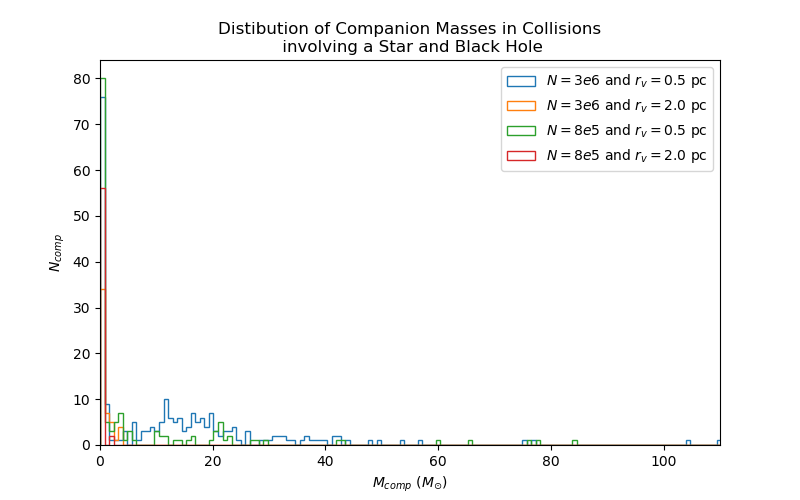

In [90]:
# histogram of companions masses
f,ax = plt.subplots(figsize = (8,5))

n,bins,patches = ax.hist(compMass3e605,bins = np.linspace(0,120,num=150),facecolor='blue',histtype='step',\
                         label='$N = 3e6$ and $r_v=0.5$ pc')
n2,bins2,patches2 = ax.hist(compMass3e620,bins = np.linspace(0,120,num=150),facecolor='red',histtype='step',\
                            label='$N = 3e6$ and $r_v=2.0$ pc',)
n3,bins3,patches3 = ax.hist(compMass8e505,bins = np.linspace(0,120,num=150),facecolor='green',histtype='step',\
                            label='$N = 8e5$ and $r_v=0.5$ pc')
n4,bins4,patches4 = ax.hist(compMass8e520,bins = np.linspace(0,120,num=150),facecolor='yellow',histtype='step',\
                            label='$N = 8e5$ and $r_v=2.0$ pc')
ax.set_title("Distibution of Companion Masses in Collisions\n involving a Star and Black Hole")
ax.set_xlabel("$M_{comp}$ ($M_{\odot}$)")
ax.set_ylabel("$N_{comp}$")
ax.set_xlim(0,110)
ax.legend()

<IPython.core.display.Javascript object>


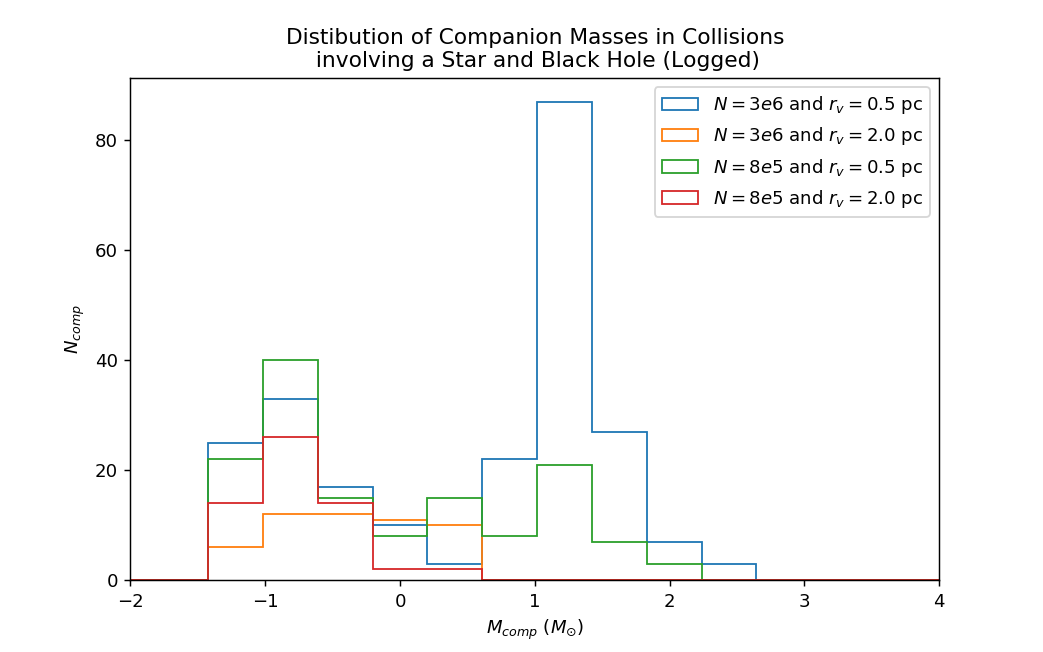

In [101]:
# histogram of companions masses
f,ax = plt.subplots(figsize = (8,5))

n,bins,patches = ax.hist(np.log10(compMass3e605),bins = np.linspace(-12,12,num=60),facecolor='blue',histtype='step',\
                         label='$N = 3e6$ and $r_v=0.5$ pc')
n2,bins2,patches2 = ax.hist(np.log10(compMass3e620),bins = np.linspace(-12,12,num=60),facecolor='red',histtype='step',\
                            label='$N = 3e6$ and $r_v=2.0$ pc',)
n3,bins3,patches3 = ax.hist(np.log10(compMass8e505),bins = np.linspace(-12,12,num=60),facecolor='green',histtype='step',\
                            label='$N = 8e5$ and $r_v=0.5$ pc')
n4,bins4,patches4 = ax.hist(np.log10(compMass8e520),bins = np.linspace(-12,12,num=60),facecolor='yellow',histtype='step',\
                            label='$N = 8e5$ and $r_v=2.0$ pc')
ax.set_title("Distibution of Companion Masses in Collisions\n involving a Star and Black Hole (Logged)")
ax.set_xlabel("$M_{comp}$ ($M_{\odot}$)")
ax.set_ylabel("$N_{comp}$")
ax.set_xlim(-2,4)
ax.legend()

/home/mitchello457/Anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


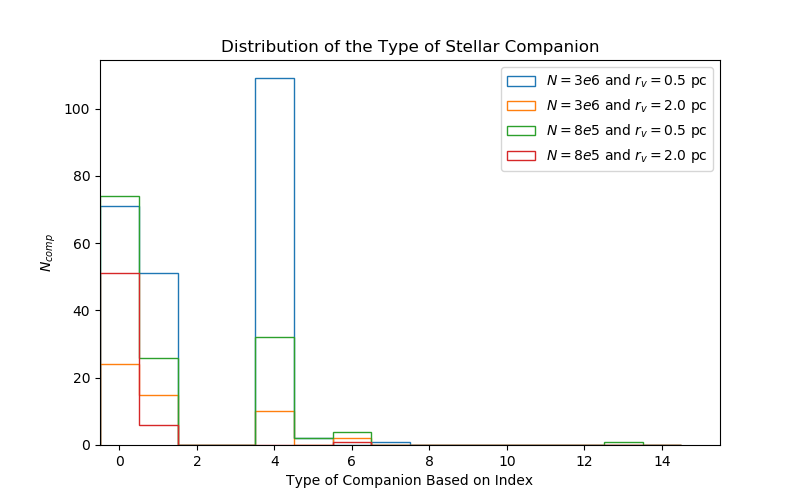

In [92]:
#Type of companion
f,ax = plt.subplots(figsize=(8,5))
n,bins,patches = ax.hist(compType3e605,bins = np.linspace(0,15,num=16),facecolor='blue',histtype='step',\
                         align='left',label='$N = 3e6$ and $r_v=0.5$ pc')
n2,bins2,patches2 = ax.hist(compType3e620,bins = np.linspace(0,15,num=16),facecolor='red',histtype='step',\
                            align='left',label='$N = 3e6$ and $r_v=2.0$ pc')
n3,bins3,patches3 = ax.hist(compType8e505,bins = np.linspace(0,15,num=16),facecolor='green',histtype='step',\
                            align='left',label='$N = 8e5$ and $r_v=0.5$ pc')
n4,bins4,patches4 = ax.hist(compType8e520,bins = np.linspace(0,15,num=16),facecolor='yellow',histtype='step',\
                            align='left',label='$N = 8e5$ and $r_v=2.0$ pc')
ax.set_title("Distribution of the Type of Stellar Companion")
ax.set_xlabel("Type of Companion Based on Index")
ax.set_ylabel("$N_{comp}$")
ax.set_xlim(-0.5,15.5)
ax.legend()

/home/mitchello457/Anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


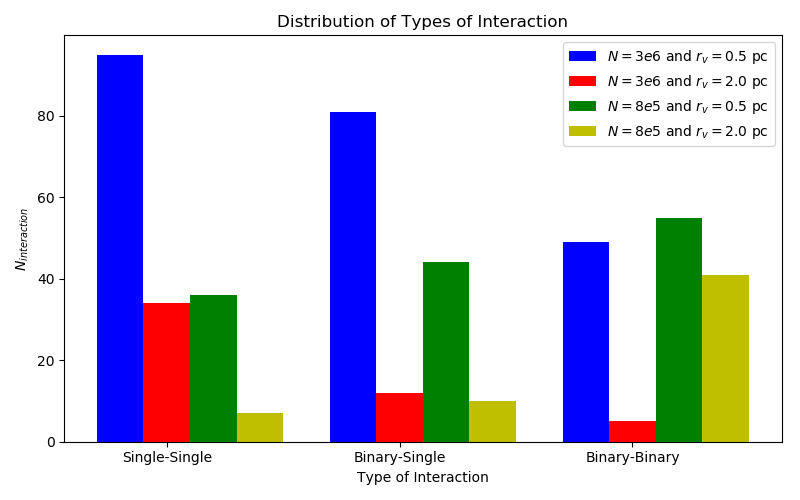

In [93]:
# data to plot
n_groups = 3
int3e605 = (ss3e605,bs3e605,bb3e605)
int3e620 = (ss3e620,bs3e620,bb3e620)
int8e505 = (ss8e505,bs8e505,bb8e505)
int8e520 = (ss8e520,bs8e520,bb8e520)
 
# create plot
fig, ax = plt.subplots(figsize=(8,5))
index = np.arange(n_groups)
bar_width = 0.20
opacity = 1
 
rects1 = plt.bar(index, int3e605, bar_width,
                 alpha=opacity,
                 color='b',
                 label='$N = 3e6$ and $r_v=0.5$ pc')
 
rects2 = plt.bar(index + bar_width, int3e620, bar_width,
                 alpha=opacity,
                 color='r',
                 label='$N = 3e6$ and $r_v=2.0$ pc')

rects3 = plt.bar(index + 2*bar_width,int8e505, bar_width,alpha=opacity,color='g',label='$N = 8e5$ and $r_v=0.5$ pc')
                 
rects4 = plt.bar(index + 3*bar_width,int8e520,bar_width,alpha = opacity,color='y',label='$N = 8e5$ and $r_v=2.0$ pc')
 
plt.xlabel('Type of Interaction')
plt.ylabel('$N_{interaction}$')
plt.title('Distribution of Types of Interaction')
plt.xticks(index + bar_width, ('Single-Single', 'Binary-Single', 'Binary-Binary'))
plt.legend()

plt.tight_layout()
plt.show()

In [94]:
def trackBH(infile1,infile2,head=True):
    BHlist = []
    prevBH = []
    line = infile1.readline()
    if head == True:
        header = line
        line = infile1.readline()
    while line:
        curBH = [0,0,0] # [id of bh, collided mass, number of collisions]
        # initialize constants
        type3 = -1
        curID = -1
        
        # split line
        sline = line.split(" ")
        
        # get type of object
        for elem in sline:
            if elem[:5] == "type1":
                type1 = int(elem[6:])
            if elem[:5] == "type2":
                type2 = int(elem[6:])
            if elem[:5] == "type3":
                type3 = int(elem[6:])
        
        # get id of input black hole
        info = sline[3].split(":")
        if type1 == 14:
            curID = int(info[0].split("(")[0][4:])
        if type2 == 14:
            curID = int(info[1].split("(")[0][4:])
        if type3 == 14:
            curID = int(info[2].split("(")[0][4:])
        if curID not in prevBH:
            curBH[0] = curID
            prevBH.append(curID)
        
        # record collided mass
        if type1 !=14:
            mass = float(info[0].split("(")[1][3:-1])
            curBH[1] += mass
        if type2 !=14:
            mass = float(info[1].split("(")[1][3:-1])
            curBH[1] += mass
        if type3 != 14 and type3 > 0:
            mass = float(info[2].split("(")[1][3:-1])
            curBH[1] += mass
            
        # get merger id and update id
        curBH[2] += 1
        curID = int(sline[2].split("(")[0][4:])
        curBH[0] = curID
        
        print(curBH)
        print()
        print(BHlist)
        print()
        print(prevBH)
        
        # check other collsions input for tracked black hole
        infile2.seek(0)
        newline = infile2.readline()
        if head == True:
            newline = infile2.readline()
        while newline:
            match1 = False
            match2 = False
            match3 = False
            ID1 = -1
            ID2 = -1
            ID3 = -1
            
            # split line
            newsline = line.split(" ")
            
            # compare curID with newID
            ## get type of object
            for elem in newsline:
                if elem[:5] == "type1":
                    type1 = int(elem[6:])
                if elem[:5] == "type2":
                    type2 = int(elem[6:])
                if elem[:5] == "type3":
                    type3 = int(elem[6:])
            ## compare
            newinfo = newsline[3].split(":")
            if type1 == 14:
                ID1 = int(newinfo[0].split("(")[0][4:])
            if type2 == 14:
                ID2 = int(newinfo[1].split("(")[0][4:])
            if type3 == 14:
                ID3 = int(newinfo[2].split("(")[0][4:])
            if ID1 == curBH[0]:
                match1 = True
            elif ID2 == curBH[0]:
                match2 = True
            elif ID3 == curBH[0]:
                match3 = True
                
            # record collided mass
            ## if not a black hole, update mass
            if match1 == True:
                if type2 != 14:
                    mass = float(newinfo[1].split("(")[1][3:-1])
                    curBH[1] += newmass
                if type3 != 14:
                    mass = float(newinfo[2].split("(")[1][3:-1])
                    curBH[1] += newmass
            elif match2 == True:
                if type1 != 14:
                    mass = float(newinfo[0].split("(")[1][3:-1])
                    curBH[1] += newmass
                if type3 != 14:
                    mass = float(newinfo[2].split("(")[1][3:-1])
                    curBH[1] += newmass
            elif match3 == True:
                if type1 != 14:
                    mass = float(newinfo[0].split("(")[1][3:-1])
                    curBH[1] += newmass
                if type2 != 14:
                    mass = float(newinfo[1].split("(")[1][3:-1])
                    curBH[1] += newmass
            
                
            # get new merger id and update
            if match1 == True or match2 == True or match3 == True:
                curBH[2] += 1
                curID = int(newsline[2].split("(")[0][4:])
                curBH[0] = curID
            
            # get newline to continue inner loop
            newline = infile2.readline()
            
        # add Black Hole data to the list
        BHlist.append(curBH)
        
        # get line to continue outer loop
        line = infile1.readline()
        
        #return values
        return BHlist

In [95]:
bhcoll20 = open("data/richBH/bhstar.collision2.log")

In [96]:
BHs20 = trackBH(bhcoll20,bhcoll20)
bhcoll20.close()

[920675, 5.71692, 1]

[]

[111187]


In [97]:
print(BHs20)

[[920675, 5.71692, 1]]


In [30]:
print(len(time8e505))
print(len(time8e520))

135
58
